<center>
    COMP4600/5300 - Reinforcement Learning

# Homework 1 - K-armed Bandit Algorithms

### Due: Monday, September 20th 11:59 pm
    
</center>

Student Name: Kevin Lu

The purpose of this homework is to study different properties of multi-armed bandit algorithms.

In [1]:
# You are allowed to use the following modules
import numpy as np
import matplotlib.pyplot as plt 

## Part 1 

Build a testbed by generating 500 randomly selected k-armed bandit problems with $k = 7$.
For each bandit problem, select the true action values from a Gaussian distribution with mean 0 and variance 1.0. For each action $a$, select an actual reward value from a normal distribution with mean $Q^*(a)$ and variance 1.0. For an algorithm, one run includes playing a single bandit problem for 1000 time steps. The algorithm's behavior will be evaluated by averaging its performance over 500 bandit problems.

In [2]:
# Write a function that generates one k-armed bandit problem
# that returns Q*(a) for that problem

#function of testbed for 1 run
def k_armed_bandit(k):
    
    q = np.random.normal(0,1,k)

    return q

## Part 2

Implement the sample-average algorithm and run it on the testbed you developed in previous part according to the following settings:
1. Using greedy action selection
2. Using $\varepsilon$-greedy action selection with $\varepsilon=0.01$ and $\varepsilon=0.1$
3. Using upper-confidence bound action selection with $c=1$ and $c=2$


In [3]:
#takes epsilon, # arms, current q_estimates as parameters
def epsilon_greedy(e, k, q_estimates):
    #generate a random probability
    p = np.random.random()
                
    #initialize choice
    choice = None
        
    if p < e:
        #pick a random arm
        choice = np.random.choice(k)
        return choice
                
    else:
        #automatically picks the best q(a) action
        choice = np.argmax(q_estimates)
        return choice

In [17]:
#takes current # times chosen for each arm, current timesteps, c value as parameters
def ucb(times_chosen, timesteps, c):
    #number of arms
    number_arms = len(times_chosen)
    #creates array for the uncertainty for each arm
    ucb_arms = np.zeros(number_arms)
    
    for arm in range(number_arms):
        #if arm has not been chosen, uncertainty is very high
        if times_chosen[arm] == 0:
            ucb_arms[arm] = np.inf 
        #use the ucb function
        else:
            ucb_arms[arm] = c * np.sqrt((np.log(timesteps+1) / times_chosen[arm]))
    
    #returns uncertainty for each arm
    return ucb_arms   

In [21]:
# Write a function that plays a given k-armed bandit problem
# this function should include greedy, epsilon-greedy and UCB action selection strategies.
# You can include all strategies in one function or write two functions (one for epsilon-greedy and another for UCB)
# your implementation should return the selected action and the reward gained by selecting that action

def play_k_armed_bandit(e,c,k,i,q,q_estimates,times_chosen):
                
    if c == 0:
        choice = epsilon_greedy(e, k, q_estimates)
        #gives a reward with mean q[choice] and variance 1
        reward = np.random.normal(q[choice],1)
        return choice, reward
                
    elif c > 0 and e == 0:
        #picks the choice based on the current q_estimates and ucb
        lst = q_estimates + ucb(times_chosen,i,c)
        choice = np.argmax(lst)
        #gives a reward with mean q[choice] and variance 1
        reward = np.random.normal(q[choice],1)
        return choice, reward
                
    else:
        print("please use one of the strategies above")
        return 0;

In [22]:
# Write a function that plays all the games asked in the question
# your implementation should loop over all strategies, all runs, and all time steps
# and should output the collected rewards and number of best action selections for each strategy

def play_all(strategy,k,trials,timesteps):
    
    #the given strategies
    strat = [1,2,3,4,5]
    
    #picking a value not in strat
    if strategy not in strat:
        print("Please pick a given strategy")
        return 0;
    
    elif strategy == 1:
        e = 0
        c = 0
    
    elif strategy == 2:
        e = 0.01
        c = 0
    
    elif strategy == 3:
        e = 0.1
        c = 0
    
    elif strategy == 4:
        e = 0
        c = 1
    
    elif strategy == 5:
        e = 0
        c = 2
        
    #array to store how accurate the best arm is chosen
    accuracy = np.zeros(timesteps)
    #avg of total reward for each timestep
    avg_reward = np.zeros(timesteps)
        
    for trial in range(trials):
            #the true q(a)
            q = k_armed_bandit(k)
        
            #this gets updated every time a particular q(a) is picked
            q_estimates = np.zeros(k)
            
            #best q(a)
            best_arm = np.argmax(q)
            
            #array to store the total reward collected for each choice
            reward_at_timestep = np.zeros(timesteps)
            
            #array to store times chosen for a particular action
            times_chosen = np.zeros(k)
            
            for i in range(timesteps):
                
                choice, reward = play_k_armed_bandit(e,c,k,i,q,q_estimates,times_chosen)
                    
                #sets current reward at the current timestep
                reward_at_timestep[i] = reward
                #adds 1 each time the current choice is selected
                times_chosen[choice] += 1
                #updating the q_estimates for each choice
                q_estimates[choice] += (1./times_chosen[choice]) * (reward - q_estimates[choice])
                #checks if the best arm was selected
                best_chosen = choice == best_arm
                #adds 1 each time best arm was selected
                accuracy[i] += best_chosen
    
            #adds the current trial's rewards for each timestep
            avg_reward += reward_at_timestep
    
    #takes the average for each timestep
    avg_reward = avg_reward/trials
    avg_best_selection = (accuracy/trials)*100
    
    return avg_reward, avg_best_selection

In [23]:
# Use the previous function with actual values to run the experiments


# Your code here
num_arms = 7
num_strategies = 5
num_runs = 500
num_timesteps = 1000

a1,b1 = play_all(1,7,500,1000)
a2,b2 = play_all(2,7,500,1000)
a3,b3 = play_all(3,7,500,1000)
a4,b4 = play_all(4,7,500,1000)
a5,b5 = play_all(5,7,500,1000)


For all three settings, plot the **average reward** and **%optimal action** graphs.

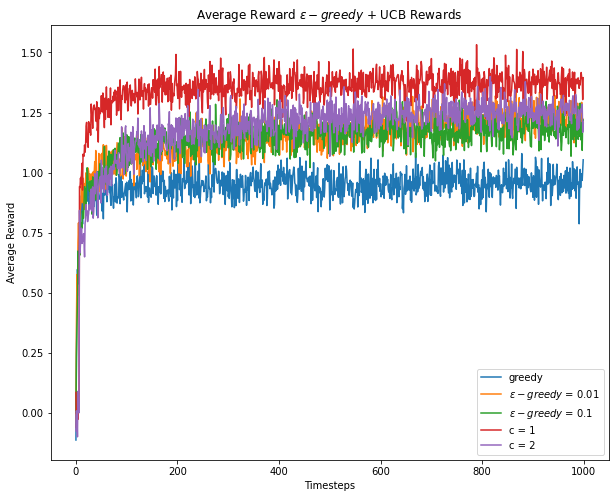

In [24]:
# Average the rewards and number of best action selections over all runs
# then plot (a) average reward, (b) %optimal action over all time steps
# you should plot two subplots (a and b) each showing all strategies

#plots the average reward for each strat
plt.figure(figsize = (10,8))
plt.plot(a1, label="greedy")
plt.plot(a2, label="$\epsilon-greedy$ = 0.01")
plt.plot(a3, label="$\epsilon-greedy$ = 0.1")
plt.plot(a4, label="c = 1")
plt.plot(a5, label="c = 2")
plt.xlabel("Timesteps")
plt.ylabel("Average Reward")
plt.title("Average Reward $\epsilon-greedy$ + UCB Rewards")
plt.legend()
plt.show()

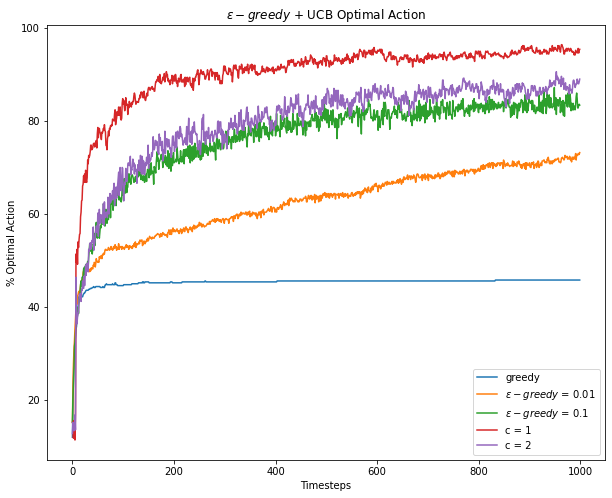

In [25]:
#plots the %optimal action for each strat
plt.figure(figsize = (10,8))
plt.plot(b1, label="greedy")
plt.plot(b2, label="$\epsilon-greedy$ = 0.01")
plt.plot(b3, label="$\epsilon-greedy$ = 0.1")
plt.plot(b4, label="c = 1")
plt.plot(b5, label="c = 2")
plt.xlabel("Timesteps")
plt.ylabel("% Optimal Action")
plt.title("$\epsilon-greedy$ + UCB Optimal Action")
plt.legend()
plt.show()

Answer the following questions:

1. which action selection method performs worse than others? Why?
>Answer: Greedy performs worse than the others because greedy never explores the other actions once it is fixed on the best q_estimates.


2. Which $\varepsilon$ value improves faster? What is the best average reward value?
>Answer: e = 0.1 improves faster since it has more chances of exploring the other actions. The best average reward value is when c = 1 around 1.4 for average reward. 



3. Which $\varepsilon$ value will perform best in the long run in terms of cumulative reward and probability of selecting the best action? How much better will it be?
>Answer: e = 0.1. Compared to e = 0.01, e = 0.1 obtains a higher average reward roughly 0.1 higher since it it has around 80% optimal action as compared to around 60% for e = 0.01. Hence around 20% more optimal.



4. What is the difference between results from $c=1$ and $c=2$? Why?
>Answer: A difference in c value means that the ucb term will change. When c = 2 the ucb term will be larger, meaning that there will be more uncertainty with the ucb term. c = 2 will take bigger steps which in the long run makes it take longer for q_estimates to approach the true q value compared to c = 1. Hence c = 1 will be more likely to obtain the more optinum action.



5. Why is there a performance spike on the 8th step for the UCB method?
>Answer: This spike is caused after the agent has selected all of the available arms once, therefore on the 8th step the agent is almost guarenteed to pick the best optimal action. Because the ucb value will be the same after each arm has been selected, only the q_estimates value will be the deciding factor for the best optimal action.



## Part 3*

Implement the Gradient Bandit algorithm and plot the **average reward** and **%optimal action** graphs for the testbed you developed according to the following settings:
1. Using $\alpha=0.01$, $\alpha=0.1$, and $\alpha=0.5$
2. Using no reward baseline, reward baseline of +5, reward baseline of +10


In [10]:
# Your code here


Answer the following questions:


1. How do you compare the effect of reward baseline (discuss all scenarios)?
>Answer:



2. How do you compare the effect of step size (discuss all scenarios)?
>Answer:

